# LIBRARIES & DATA

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Machine Learning
import sklearn as skl

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Mute Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\cg\Desktop\obesity.csv')
#https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# EDA & DATA PREPROCESSING

*Data preprocessing is the process of evaluating, filtering, manipulating, and encoding data so that a machine learning algorithm can understand it and use the resulting output. The major goal of data preprocessing is to eliminate data issues.*

In [3]:
df.shape

(2111, 17)

**Feature Selection, Engineering, Renaming**

In [4]:
df.rename(columns={'family_history_with_overweight': 'FHWO'}, inplace=True)

In [5]:
df['BMI'] = df['Weight']/(df['Height']**2)

**Data Types & Formatting**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   object 
 1   Age         2111 non-null   float64
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   FHWO        2111 non-null   object 
 5   FAVC        2111 non-null   object 
 6   FCVC        2111 non-null   float64
 7   NCP         2111 non-null   float64
 8   CAEC        2111 non-null   object 
 9   SMOKE       2111 non-null   object 
 10  CH2O        2111 non-null   float64
 11  SCC         2111 non-null   object 
 12  FAF         2111 non-null   float64
 13  TUE         2111 non-null   float64
 14  CALC        2111 non-null   object 
 15  MTRANS      2111 non-null   object 
 16  NObeyesdad  2111 non-null   object 
 17  BMI         2111 non-null   float64
dtypes: float64(9), object(9)
memory usage: 297.0+ KB


**Sort Values & Columns**

**Outliers** - Identify and Handle Outliers in Data.

<Axes: xlabel='NObeyesdad', ylabel='BMI'>

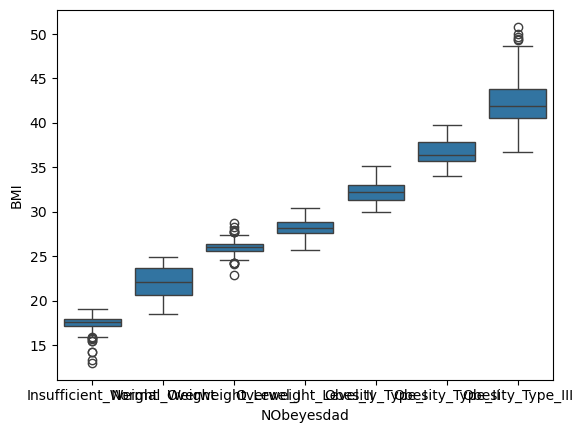

In [7]:
sns.boxplot(data=df, x="NObeyesdad", y="BMI",
           order=['Insufficient_Weight', 'Normal_Weight', 
                  'Overweight_Level_I', 'Overweight_Level_II', 
                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])

**Null Values**

In [8]:
#Count of Nulls in Each Column
list(df.isnull().sum().items())

[('Gender', 0),
 ('Age', 0),
 ('Height', 0),
 ('Weight', 0),
 ('FHWO', 0),
 ('FAVC', 0),
 ('FCVC', 0),
 ('NCP', 0),
 ('CAEC', 0),
 ('SMOKE', 0),
 ('CH2O', 0),
 ('SCC', 0),
 ('FAF', 0),
 ('TUE', 0),
 ('CALC', 0),
 ('MTRANS', 0),
 ('NObeyesdad', 0),
 ('BMI', 0)]

**Duplicates**

In [9]:
duplicate = df[df.duplicated()]
if len(duplicate) == 0:
    print("No Duplicate Rows")
else:
    print(f"Duplicate Rows: {len(duplicate)}")

Duplicate Rows: 24


**Encoding** - Encode categorical data with numerical data so it can be processed by ML algorithms. *Done with One-Hot Encoding, Label Encoding, Ordinal Encoding, etc.*

In [10]:
# Encode Columns with Yes/No with 1/0
df[['FHWO', 'FAVC', 'SMOKE', 'SCC']] = df[['FHWO', 'FAVC', 'SMOKE', 'SCC']].replace({'yes': 1, 'no': 0})

In [11]:
# Encode Ordinal Columns
df[['CAEC']] = df[['CAEC']].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df[['CALC']] = df[['CALC']].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

In [12]:
# Create Dummy Columns to Encode non-Ordinal values

# Create dummy columns for MTRANS variable.
df = pd.get_dummies(df, columns = ['MTRANS'])
df = pd.get_dummies(df, columns = ['Gender'])

# Encode False/True with 0/1 in MTRANS dummy columns
df[['MTRANS_Automobile','MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']] = df[['MTRANS_Automobile','MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']].replace({False: 0, True: 1})
df[['Gender_Male', 'Gender_Female']] = df[['Gender_Male', 'Gender_Female']].replace({False: 0, True: 1})

In [13]:
# Encode Ordinal Categorical Outcome Variable

from sklearn.preprocessing import OrdinalEncoder

# Determine order of NObeyesdad Values

obLevels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
obLevels

# Encode OB Categories
encoder = OrdinalEncoder(categories = [obLevels])

# Fit Transform
encoder.fit_transform(df[['NObeyesdad']])

# Encode Outcome Column 
df['NObeyesdad'] = encoder.fit_transform(df[['NObeyesdad']])

#Move outcome variable to the end of the DF
df.insert(len(df.columns)-1, 'NObeyesdad', df.pop('NObeyesdad'))

df.head()

,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,CALC,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male,NObeyesdad
0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,...,0,24.386526,0,0,0,1,0,1,0,1.0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,...,1,24.238227,0,0,0,1,0,1,0,1.0
2,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,...,2,23.765432,0,0,0,1,0,0,1,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,...,2,26.851852,0,0,0,0,1,0,1,2.0
4,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,...,1,28.342381,0,0,0,1,0,0,1,3.0


<Axes: >

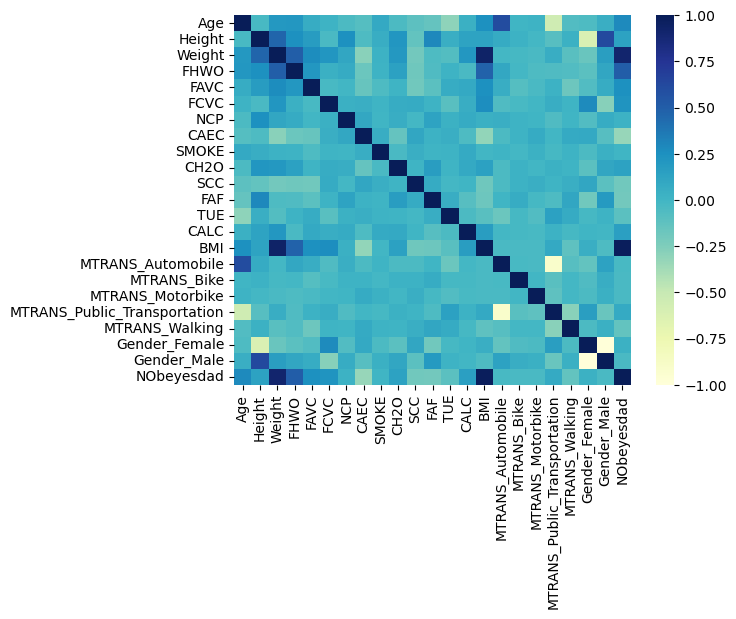

In [14]:
sns.heatmap(df.corr(), cmap="YlGnBu")

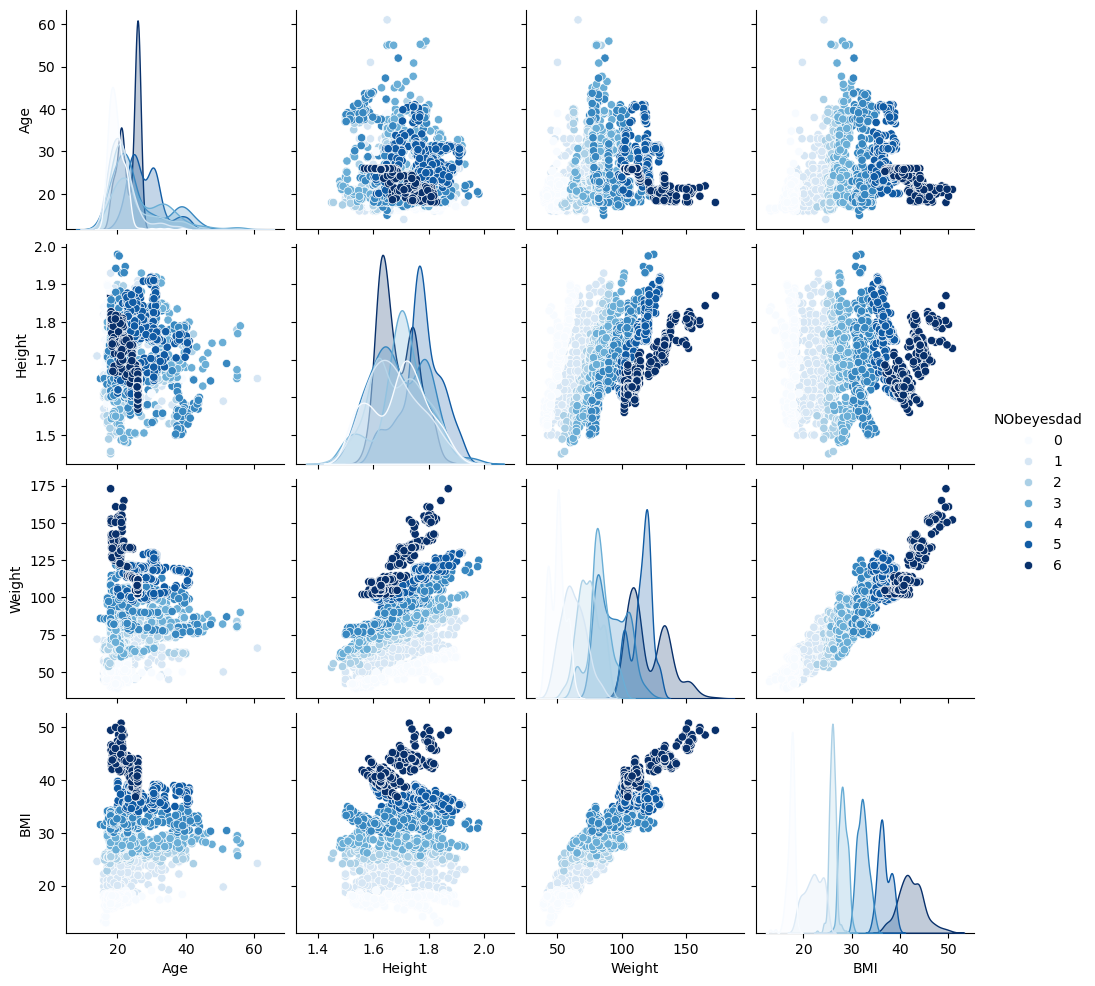

In [15]:
sns.pairplot(
    df[['Age', 'Height', 'Weight', 'BMI', 'NObeyesdad']],
    hue = 'NObeyesdad',
    palette = 'Blues'
)

<Axes: xlabel='BMI', ylabel='Count'>

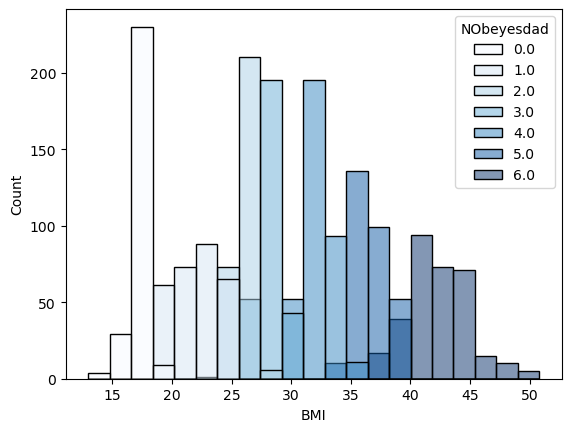

In [16]:
sns.histplot(data = df, x = 'BMI', hue = 'NObeyesdad', palette = 'Blues')

**Dimensionality Reduction** - Reduce the number of features in your dataset to improve computational efficiency and reduce overfitting. *Done with Principal Component Analysis*, t-SNE, LDA.

**Oversampling/Undersampling** - Adress potential biases in model performance by balancing distribution of classes in training data.

# MACHINE LEARNING

In [18]:
X = df.drop('NObeyesdad', axis=1).values
y = df['NObeyesdad'].values.reshape(-1, 1)

print(f'X Shape: {X.shape}, y Shape: {y.shape}')

X Shape: (2111, 22), y Shape: (2111, 1)


**Train Test Split**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=2850)

# First Model (Logistic Regression, all Columns)

In [20]:
from sklearn import linear_model

# Create and train Model
model = linear_model.LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluate Model
from sklearn.metrics import classification_report

print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92        58
         1.0       0.71      0.57      0.63        63
         2.0       0.60      0.59      0.60        61
         3.0       0.57      0.52      0.54        56
         4.0       0.63      0.62      0.62        65
         5.0       0.79      1.00      0.88        60
         6.0       0.97      1.00      0.98        60

    accuracy                           0.74       423
   macro avg       0.74      0.75      0.74       423
weighted avg       0.74      0.74      0.74       423



## Second Model (Logistic Regression, all Columns, Scaled Data)

**Standardization/Scaling** - Data standardization is the process of transforming the values of the features of a dataset until they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature dominates the distance calculations in an algorithm, and can help to improve the performance of the algorithm. *Done with Min-Max Scaling, Z-Score Normalization, Robust Scaling, etc.*)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=df.columns)

# Since Column should not be scaled, revert to previous data.
scaled_data_df['NObeyesdad'] = df['NObeyesdad']

In [22]:
from sklearn.model_selection import train_test_split

X = scaled_data_df.drop('NObeyesdad', axis=1).values
y = scaled_data_df['NObeyesdad'].values.reshape(-1, 1)

print(f'X Shape: {X.shape}, y Shape: {y.shape}')

# Recreate X/y train/variables with Scaled Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=2850)

X Shape: (2111, 22), y Shape: (2111, 1)


In [23]:
# Create and train Model
model = linear_model.LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93        58
         1.0       0.71      0.51      0.59        63
         2.0       0.58      0.64      0.61        61
         3.0       0.55      0.57      0.56        56
         4.0       0.69      0.68      0.68        65
         5.0       0.90      1.00      0.94        60
         6.0       1.00      1.00      1.00        60

    accuracy                           0.76       423
   macro avg       0.76      0.77      0.76       423
weighted avg       0.76      0.76      0.76       423



## Third Model (Logistic Regression, all Columns, Scaled Data, Hyperparameter Tuned)

**Hyperparameter Tuning**
The process of finding the optimal set of hyperparameters for an ML algorithm. GridSearchCV and RandomizedSearchCV are common technqiues for exploring the hyperparameter space. Once hyperparameters are tuned, you can rerun your ML agorithm to see if it improved.

Choosing values for param_grid is a critical step in optimizing your ML models. Use a systematic approach and continue iterating, since there is no one size fit all solution.

GridSearchCV will systematically try every combination of these values. For instance, if you have 'n' hyperparameters each with 'k' possible values, GridSearchCV will evaluate k^n combinations. By systematically exploring this grid, GridSearchCV helps in finding the best set of hyperparameters for your model based on performance metrics.

Use RandomizedSearchCV when dealing with larger or continuous parameter spaces and want to trade off some of the thoroughness for computational efficiency.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter Grid
param_grid = {
    'C': [.001, .01, .1, 1, 10, 100],  # needs further in-depth understanding
    'penalty': ['l1', 'l2'],  # needs further in-depth understanding
    'solver': ['liblinear'] # needs further in-depth understanding
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Figure out what each GridSearchCV value corresponds to.

# Best Parameters:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.78


In [25]:
from sklearn.metrics import classification_report

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        58
         1.0       0.77      0.57      0.65        63
         2.0       0.56      0.62      0.59        61
         3.0       0.55      0.55      0.55        56
         4.0       0.68      0.68      0.68        65
         5.0       0.88      1.00      0.94        60
         6.0       1.00      1.00      1.00        60

    accuracy                           0.77       423
   macro avg       0.77      0.77      0.77       423
weighted avg       0.77      0.77      0.77       423



## Fourth Model (Logistic Regression, Feature Elimination Applied, Scaled Data, Hyperparameter Tuned)

**Determining Important Features**

In [26]:
#Analyzing the coefficients of the previous model to determine feature importance. Larger absolute values indicate more significant features.

feature_importance = np.abs(model.coef_[0])
feature_importance

array([5.13568297e-01, 1.36482518e+00, 4.42964222e+00, 1.83132486e-02,
       1.62874027e-02, 3.62642862e-01, 1.25088863e-01, 2.18472432e-03,
       1.93935058e-01, 2.22456425e-01, 9.81339770e-03, 1.59918629e-01,
       8.19444744e-02, 7.58499299e-02, 5.81132569e+00, 1.14357520e-01,
       2.77604195e-01, 3.07013209e-01, 2.02567813e-02, 1.10915906e-01,
       2.33563904e-01, 2.33563904e-01])

In [27]:
#Recursive Feature Elimination (RFE): Recursively remove features and build the model to identify the most important features.
from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train, y_train)

# Return Extracted Features by calling a list of our Independent variable columns and filtering to see only variables where RFE Get Support is "True"
df.drop('NObeyesdad', axis=1).columns[rfe.get_support()]

Index(['Weight', 'FCVC', 'BMI', 'Gender_Female', 'Gender_Male'], dtype='object')

In [28]:
# Recreating X with only selected important features
# no changes to y variable

X = scaled_data_df[['Weight', 'FCVC', 'BMI', 'Gender_Female', 'Gender_Male']].values

print(f'X Shape: {X.shape}, y Shape: {y.shape}')

# Recreate X/y train/variables with Scaled Selected Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=2850)

X Shape: (2111, 5), y Shape: (2111, 1)


In [29]:
# Use the same GridSearchCV method as above to train data using only important features

# Define Hyperparameter Grid
param_grid = {
    'C': [.001, .01, .1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")

from sklearn.metrics import classification_report

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.74
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        58
         1.0       0.85      0.71      0.78        63
         2.0       0.50      0.33      0.40        61
         3.0       0.36      0.34      0.35        56
         4.0       0.56      0.80      0.66        65
         5.0       0.94      1.00      0.97        60
         6.0       1.00      1.00      1.00        60

    accuracy                           0.74       423
   macro avg       0.74      0.74      0.73       423
weighted avg       0.74      0.74      0.73       423



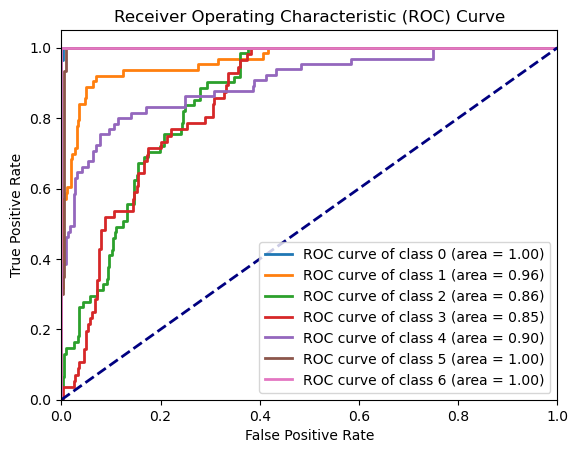

In [30]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_pred_prob = grid_search.predict_proba(X_test)

#binarize Y because we need it to go from shape (n,) to (n,m)
y_bin = label_binarize(y_test, classes = np.unique(y_test))
y_bin.shape

fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_classes = len(np.unique(y))

for i in range (n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:,i], y_pred_prob[:,i])
    roc_auc = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Fifth Model (XGBoost w/ Hyperparameter Tuning, Feature Elimination Applied, Scaled Data)

In [31]:
import xgboost as xgb
from sklearn.preprocessing import label_binarize

X = scaled_data_df.drop('NObeyesdad', axis=1).values
y = scaled_data_df['NObeyesdad'].values.reshape(-1, 1)


print(f'X Shape: {X.shape}, y Shape: {y.shape}')

# Recreate X/y train/variables with Scaled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2850)


X Shape: (2111, 22), y Shape: (2111, 1)


In [32]:
from sklearn.metrics import classification_report

model = xgb.XGBClassifier(
    objective='multi:softmax',  # Specify the type of problem (multi-class classification)
    num_class=7,  # Number of classes in the target variable
    eval_metric='mlogloss'  # Evaluation metric for multi-class classification
)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Detailed classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        58
         1.0       0.97      1.00      0.98        63
         2.0       0.95      0.95      0.95        61
         3.0       0.96      0.95      0.95        56
         4.0       1.00      1.00      1.00        65
         5.0       1.00      1.00      1.00        60
         6.0       1.00      1.00      1.00        60

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



Jesus christ it's Jason Bourne. With all the data available in our dataframe, XGBoost has an accuracy of 98%. Which variables had the most impact? Let's see.

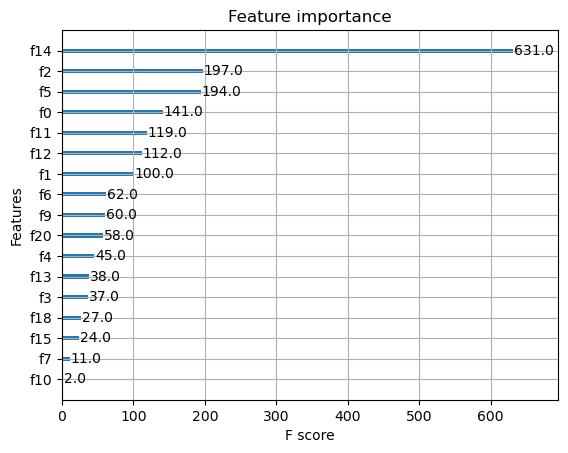

In [33]:
xgb.plot_importance(model)
plt.show()

Top 5 Important Features (in order of Importance): BMI, FCVC, Weight, Age, TUE

# EVALUATION AND ASSESSMENT

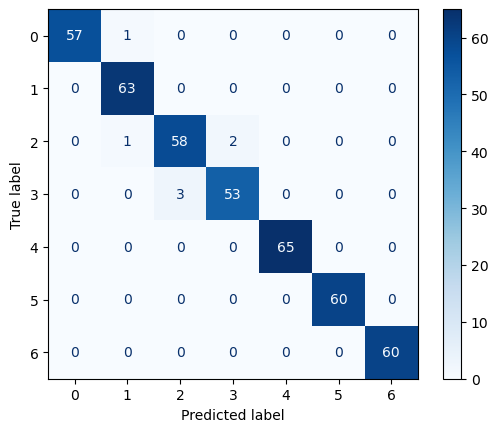

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_
                             )

disp = disp.plot(cmap=plt.cm.Blues,values_format='g')

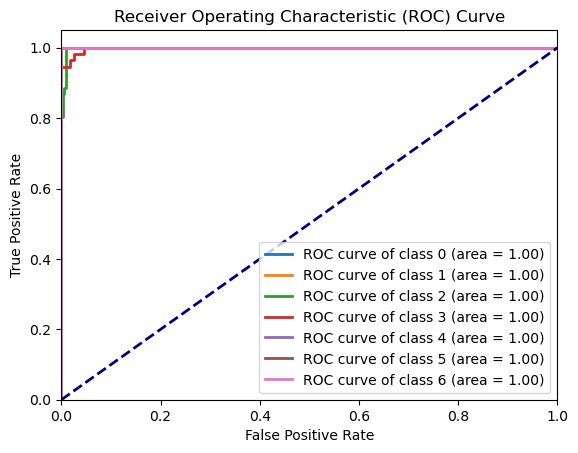

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)

#binarize Y because we need it to go from shape (n,) to (n,m)
y_bin = label_binarize(y_test, classes = np.unique(y_test))
y_bin.shape

fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_classes = len(np.unique(y))

for i in range (n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:,i], y_pred_prob[:,i])
    roc_auc = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()